In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pygraphon.graphons.StepGraphon import StepGraphon
import numpy as np
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt
from pygraphon.utils.utils_graph import edge_density
from tqdm import tqdm

In [3]:
graphon_matrix = np.array([[0.8,0.4,0.4],[0.4,0.8,0.4],[0.4,0.4,0.8]])
graphon = StepGraphon(graphon_matrix,1/3)

In [4]:
print(graphon.integral(graphon_matrix), graphon.integral())

0.5333333333333333 0.9999999999999999


In [5]:
graphon.graphon

array([[1.5 , 0.75, 0.75],
       [0.75, 1.5 , 0.75],
       [0.75, 0.75, 1.5 ]])

In [6]:
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt

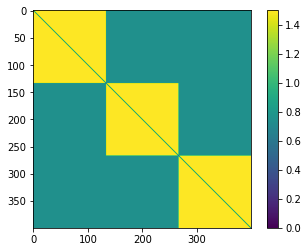

In [7]:
plt.imshow(graphon._get_edge_probabilities(400,False,True))
plt.colorbar()
plt.show()

In [10]:
A = graphon.draw(rho = 0.3,n = 300, exchangeable=False)

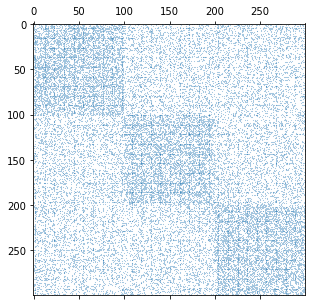

In [11]:
fig, ax = spy(A)
plt.show()

In [12]:
edge_density(A)

0.3001783723522854

In [13]:
print(edge_density(A[0:100,0:100]))
print(edge_density(A[0:100,100:200]))

0.46525252525252525
0.2315151515151515


In [15]:
from pygraphon.estimators.HistogramEstimator import HistogramEstimator
from pygraphon.estimators.MomentEstimator import MomentEstimator, SimpleMomentEstimator

In [24]:
hist = HistogramEstimator(bandwithHist= 1/3)
hist_epprox = hist.estimate(adjacency_matrix= A)

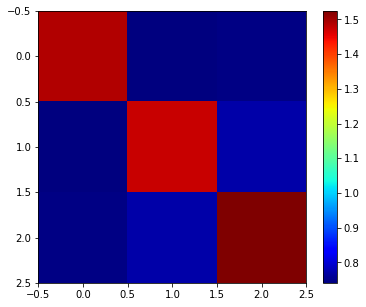

In [25]:
from pygraphon.plots.plots_graphon import plot
plot(hist_epprox)
plt.show()

In [47]:
from pygraphon.subgraph_isomorphism.CycleCount import CycleCount
counter = CycleCount(L = 9)

In [49]:
momentestimator = SimpleMomentEstimator(3)
mome_simple_approx = momentestimator.estimate(adjacency_matrix= A)

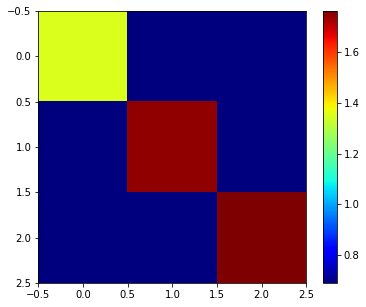

In [50]:
plot(mome_simple_approx)
plt.show()

In [51]:
mome_simple_approx.graphon

array([[1.3504888 , 0.69059531, 0.69059531],
       [0.69059531, 1.7444674 , 0.69059531],
       [0.69059531, 0.69059531, 1.76147196]])

In [52]:
mome_simple_approx.integral()

1.0